



# Digital Filtering and the CD Player

This homework is to help you understand the basic digital filtering operations and how recording and playback for digital music works.

1.  A baseband signal is a signal whose frequencies extend down to DC (or very nearly DC).  If you use an analog to digital (A/D) converter sampling at $1/T$ samples per second, what range of frequencies can you safely sample a baseband signal without risking aliasing?  What can you do to make sure that the signal going into the A/D converter is relatively free of frequencies outside that range?  Draw a block diagram of a system to record a singer using these ideas.
2.  You know how to filter a digital signal using the DFT, but we need to understand how it works in the time domain too.  Some digital filtering is actually carried out in the time domain instead of the frequency domain.  The purpose of this problem is to figure out how to do that.  Suppose you have a periodic signal $x(t) = x(t+T_0)$ sampled at $1/T$ samples per second for $N$ samples so that one period is sampled ($NT = T_0$).  You can think of this as a song lasting $T_0$ seconds, sampled every $T$ seconds using the setup you made the diagram of above. 
   
    a) Given a desired filter response in the frequency domain also having N points write an equation showing how you would find the impulse response to that filter.
    
    b) Write an expression for the filtered output, $x_f(k)$ at $t=kT$, in the time domain.  You could send this out the D/A converter to play your filtered song.  Hint: Playing the LTI game may help if you are stumped....
    
    c) Simplify this down into a single sum which is essentially a matrix mulitply or linear time invariant tranformation.
    
    d) Sometimes the song is much longer than you want your filter to be.  What do you think the advantages of having high or low N are for a filter?
    
    e) What if you make the most insignificant filter coefficients, $h(k)$, zero?  Can you compute the frequency response for that?  What could you do to make the computation time less in this instance?
    
    f) Suppose you have an embedded processor taking samples every $T = 1/2000$ of a second with its A/D converter, and then processing these samples and sending them to the digital to analog (D/A) converter.  What do you need to do to the signal to make sure your A/D converter is sampling fast enough. Suppose your processor has the speed to do at least a hundred multiply and adds along with the A/D and D/A conversions in $T$ seconds.  Show how you would use this system to make a filter to remove all of the frequency components except those at $f = 200$ Hertz in real time from a signal that is of unknown duration.  In addition to a block diagram, provide pseudo code for the embedded system.  What is the latency of your filter?
    
3.  This problem investigates the idea that when recording a CD we could use a simpler analog low pass anti-alias filter if we sampled ten times faster, and applied a digital filter, decimating before we saved the data to the CD.  The technique is also applicable to the CD player.  If you use a D/A converter that is going ten times the sample rate the data was stored on the CD, then you don't need as many poles in your output filter to get the same quality of sound.  Also by digital filtering on the up and down sampling, you can neutralize some predictable frequency response problems caused by the imperfect low pass filters before the A/D and after the D/A, and even correct the frequency response of the D/A converter.  A block diagram ![diagram](CD_Recorder_Block_Diagram_Notes.jpg) we constructed together in class is helpful to understand this.

    a) CD Recording Using a Fast A/D Converter: Analog filters are not perfect (and neither are digital ones, but digital ones are a lot better in the range $-f_s/2 < f < f_s/2$, where $f_s$ is the sampling frequency).  Because of this, it usually takes a decade or more of frequency beyond the cutoff frequency, $f_0$ before the analog filter response is down sufficiently.  Analog filters drop at twenty decibels per pole per decade of frequency beyond the cutoff frequency.  This means, even for a three pole filter, it takes a decade to drop aliasing frequencies by sixty decibels.  If an A/D converter was running at ten times the highest desired frequency component, $f_h$. Then a three pole filter could drop the alias frequency components by about sixty decibels before the Nyquist frequency, $f_s/2$.  A digital filter could then be used to filter out the frequencies between $f_s/20$ and $f_s/2$.  This would be easier than making an analog filter to remove those frequencies for an A/D converter with a sample rate just barely large enough.  See the analog filter response computed below.  Design a digital filter to go with this filter.  Note that the analog filter is falling off already three decibels by the cutoff frequency, $f_0$, and this messes with your high frequency response.  If you are clever, you can compensate for this.  Plot the digital filter results, and the total response of both filers in cascade.  Then you should be able to sample this digital signal at a new sampilng frequency, $f'_s = f_s/10$ and store the result on the CD without loss of information.  This last operation is known as decimation or down sampling.


In the transfer function,
the numerator polynomial of s is:  [248.05021344]
and the denominator polynomial coefficients of s in order of decreasing power are: 
[  1.          12.56637061  78.95683521 248.05021344]


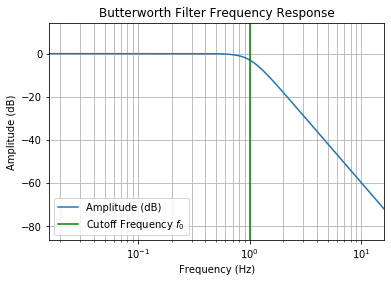

In [5]:
# This snippet of code generates an analog Butterworth filter.
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

n = 3
f_0 = 1  # The cutoff frequency.
w_0 = 2*np.pi*f_0 
b, a = signal.butter(n, w_0, 'low', analog=True)
print('In the transfer function,')
print('the numerator polynomial of s is: ', b)
print('and the denominator polynomial coefficients of s in order of decreasing power are: ')
print(a)
w, h = signal.freqs(b,a)
plt.plot(w/2/np.pi, 20*np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth Filter Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.margins(0, 0.2)
plt.grid(which='both', axis='both')
plt.axvline(w_0/2/np.pi, color='green') # cutoff frequency
plt.legend(['Amplitude (dB)','Cutoff Frequency $f_0$'])
plt.show()

    
   b) CD Playing Using Oversampling: In this problem you will figure out how to do the digital signal processing needed in an oversampling CD player.  It times past CD player advertisements used to brag "Eight times oversampling!" Essentially what happens with an oversampling CD player is that a faster D/A converter than really necessary is used, and a digital interpolation filter is employed to take the sparse data on the CD and make all the points that are played out the fast D/A converter.
   
       i. Often it is handy to work on a "toy" problem that you can see your way clear to solve.  Suppose you were trying to double the number of samples per second for a faster D/A converter.  You need to figure out what to use for the samples in between the ones you have, so if the sample is from an actual point on the CD you just send it to the D/A, but if it is in between two samples from the CD, you use an average of the two nearest neighbors.  This is actually a digital filter.  Suppose $x(k)$ for $k \in {0, 1, ..., N-1}$.  The sequence to be filtered is ${x(0), 0, x(1), 0, x(2), 0, ..., x(N-1), 0}$  What is its impulse response, $h(k)$ for $k \in {0, 1, 2, ..., 2N-1}$?
       
       ii. What is the frequency response of the above filter?
       
       iii. A drawback to the filter above is that it only takes into account nearest neighbors. If you took into account the $N$ nearest neighbors, what would you want for the filter transfer function in frequency, $n$?
       
       iv.  How would you determine the filter coefficients if you wanted to filter in the time domain?  What are the coefficients?

4.  The D/A converter does not put out only frequencies less than the [Nyquist frequency](https://en.wikipedia.org/wiki/Nyquist_frequency), $f_s/2$.  The [R-2R D/A converter](https://www.tek.com/blog/tutorial-digital-analog-conversion-r-2r-dac) is a classic circuit, and produces a stepped output.  Intuitively these steps have a lot of high frequency components.  It would be nice to know what the distortion is due to the steps in the D/A converter.  The goal would be to be able to build a better output filter for the CD player.  The one in problem 3 did not take into account the digital to analog converter (DAC) distortion.  To do this we need to go to the Fourier transform.  A helpful reference is [E. O. Brigham's textbook on the FFT](http://sar.kangwon.ac.kr/gisg/FFT_book.pdf).

    a) Find the Fourier transform of an impulse train. $$\mathscr {F} [\sum_{n=-\infty}^{\infty} \delta(t-nT)]$$
    b) Find the Fourier transform of a signal, $x(t)$, sampled with an impulse train. $$\mathscr {F} [x_s(t)] = \mathscr {F} [x(t)\sum_{k=-\infty}^{\infty} \delta(t-kT)] = \mathscr {F} [\sum_{k=-\infty}^{\infty} x(kT)\delta(t-kT)]$$
    c) If the frequency spectra of $x(t)$ was limited to $|f|<f_s/2 = 1/{2T}$ can you see how to retrieve the original signal from the samples of $x(t)$, $x(kT)$?  It isn't necessary for this problem, but I suggest you do it, and obtain an expression for $x(t)$ as a function of $x(kT)$.
 
    d) What happens when you convolve a function with an impulse function at $kT$?  $$x(t)*\delta(t-kT) = ?$$
    
    e) Can you figure out how to construct the output of the DAC using the above ideas?
    
    f) Find the transfer function of the filter that the DAC does on the original signal.  This is the transfer function we were after.  Now we can predistort the signal before it goes into the DAC.  This filter is also our friend in that it reduces the replicas at higher frequency that are there in the sampled signal $x_s(t)$ .  Knowing how much it helps out for $|f|>f_s/2$ is also useful for designing the analog low pass filter that is necessary after the DAC in the CD player.
    
    g) How would this modify your design in problem 3 above?
    
The handout for Designing FIR Filters could be helpful on this homework.